<a href="https://colab.research.google.com/github/Harshas5/AffinityAnswers/blob/main/catAnddog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:47<00:00, 23.9MB/s]


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
        labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
        labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:

from tensorflow.python.ops.math_ops import dense_bincount_eager_fallback
from keras.layers.serialization import activation
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 83ms/step - loss: 0.6015 - accuracy: 0.6671 - val_loss: 0.5181 - val_accuracy: 0.7570
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4830 - accuracy: 0.7684 - val_loss: 0.4574 - val_accuracy: 0.7904
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4029 - accuracy: 0.8168 - val_loss: 0.4582 - val_accuracy: 0.8040
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2989 - accuracy: 0.8730 - val_loss: 0.5974 - val_accuracy: 0.7990
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2016 - accuracy: 0.9186 - val_loss: 0.8367 - val_accuracy: 0.8024
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1259 - accuracy: 0.9527 - val_loss: 0.8723 - val_accuracy: 0.7962
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0793 - accuracy: 0.9715 - val_loss: 0.8138 - val_accuracy:

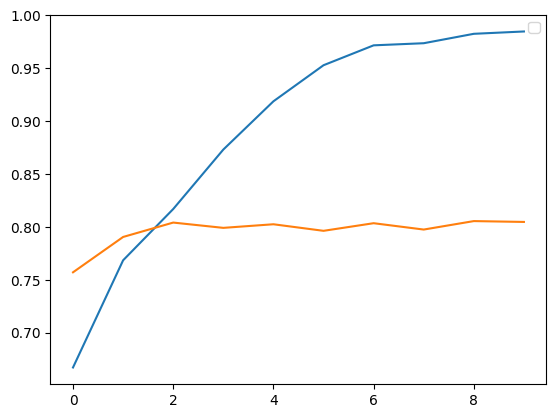

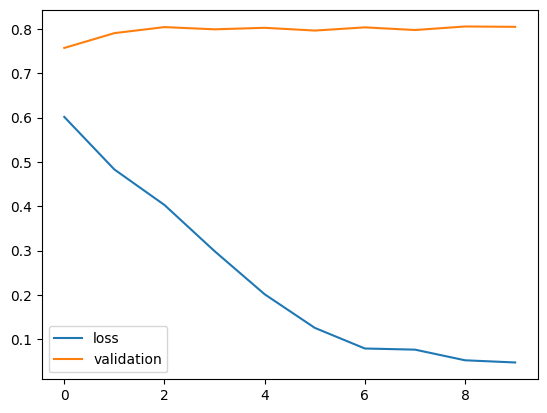

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend()
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()



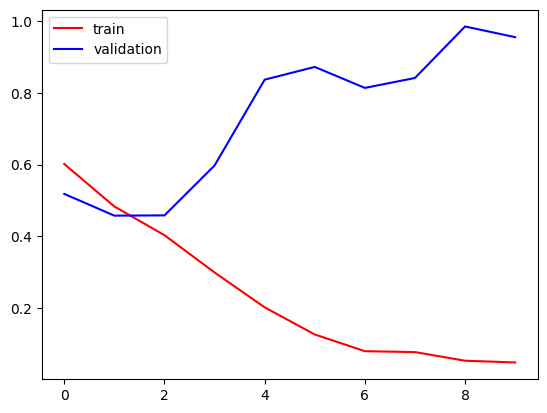

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [23]:
test_img = cv2.imread('/content/cat.0.jpg')

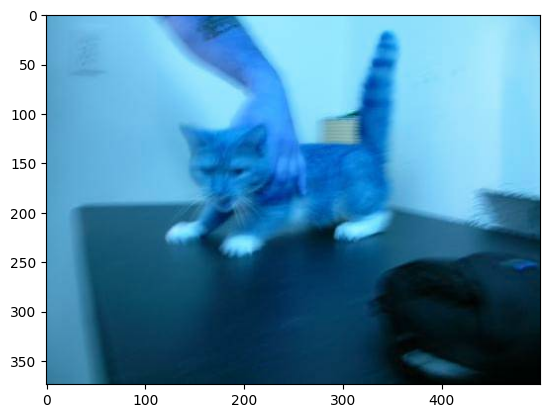

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(374, 500, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
output=model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


In [36]:

converted_value = int(output[0][0])
if converted_value==0:
  print('cat')
if converted_value==1:
  print('DOG')


cat
